In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from acquire import get_titanic_data
from prepare import prep_titanic, train_val_test

In [66]:
titanic = prep_titanic(get_titanic_data())
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [67]:
titanic.drop(columns=['sex', 'embark_town'], inplace=True)

In [68]:
train, val, test = train_val_test(titanic, 'survived')
train.shape, val.shape, test.shape

((623, 9), (134, 9), (134, 9))

In [69]:
X_train = train.drop(columns='survived')
y_train = train['survived']

X_val = val.drop(columns='survived')
y_val = val['survived']

X_test = test.drop(columns='survived')
y_test = test['survived']

- Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

- Evaluate your results using the model score, confusion matrix, and classification report.

- Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

- Run through steps increasing your min_samples_leaf and decreasing your max_depth.

- What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [70]:
seed = 42

rf = RandomForestClassifier(max_depth=10, random_state=42, min_samples_leaf=1)

In [71]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [72]:
rf.score(X_train, y_train)

0.92776886035313

In [73]:
train_preds = rf.predict(X_train)

In [74]:
TN, FP, FN, TP = confusion_matrix(y_train, train_preds).ravel()

In [75]:
TN, FP, FN, TP

(367, 17, 28, 211)

In [76]:
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       384
           1       0.93      0.88      0.90       239

    accuracy                           0.93       623
   macro avg       0.93      0.92      0.92       623
weighted avg       0.93      0.93      0.93       623



In [90]:
train_acc = []
val_acc = []
depth = []
leaf = []

for i in range(1, 11):
    
    for n in range(1,6):
        rf = RandomForestClassifier(max_depth=i, random_state=seed, min_samples_leaf=n)
    
        rf.fit(X_train, y_train)
        t_acc = (rf.score(X_train, y_train) * 100)
        train_acc.append(t_acc)
    
        v_acc = (rf.score(X_val, y_val) * 100)
        val_acc.append(v_acc)
    
        depth.append(i)
        leaf.append(n)
    

acc = pd.DataFrame({'depth':depth, 'leaf':leaf, 'train_acc':train_acc, 'val_acc':val_acc})
acc.head(10)

,depth,leaf,train_acc,val_acc
0,1,1,75.762440,74.626866
1,1,2,75.762440,74.626866
2,1,3,75.762440,74.626866
3,1,4,75.762440,74.626866
4,1,5,75.762440,74.626866
5,2,1,80.738363,81.343284
6,2,2,80.738363,81.343284
7,2,3,80.738363,81.343284
8,2,4,80.738363,81.343284
9,2,5,80.577849,82.089552


In [99]:
acc['difference'] = acc['train_acc'] - acc['val_acc']


,depth,leaf,train_acc,val_acc,difference
0,1,1,75.76244,74.626866,1.135574
1,1,2,75.76244,74.626866,1.135574
2,1,3,75.76244,74.626866,1.135574
3,1,4,75.76244,74.626866,1.135574
4,1,5,75.76244,74.626866,1.135574


In [101]:
acc.sort_values('train_acc', ascending=False).head(1)

,depth,leaf,train_acc,val_acc,difference
45,10,1,92.776886,76.865672,15.911214


In [102]:
acc.sort_values('val_acc', ascending=False).head(1)

,depth,leaf,train_acc,val_acc,difference
18,4,4,82.664526,85.074627,-2.4101


In [100]:
acc.sort_values('difference')

,depth,leaf,train_acc,val_acc,difference
18,4,4,82.664526,85.074627,-2.410100
10,3,1,81.380417,83.582090,-2.201672
14,3,5,81.380417,83.582090,-2.201672
13,3,4,81.701445,83.582090,-1.880645
11,3,2,81.861958,83.582090,-1.720131
12,3,3,82.022472,83.582090,-1.559618
9,2,5,80.577849,82.089552,-1.511703
19,4,5,82.825040,84.328358,-1.503318
16,4,2,82.985554,84.328358,-1.342804
15,4,1,82.825040,83.582090,-0.757049


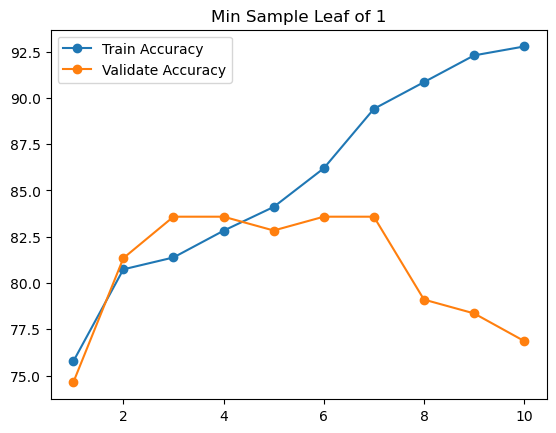

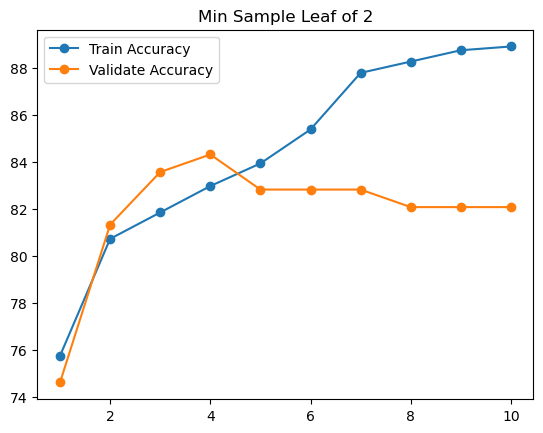

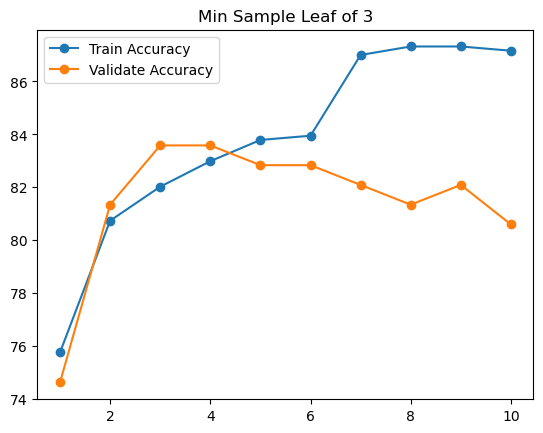

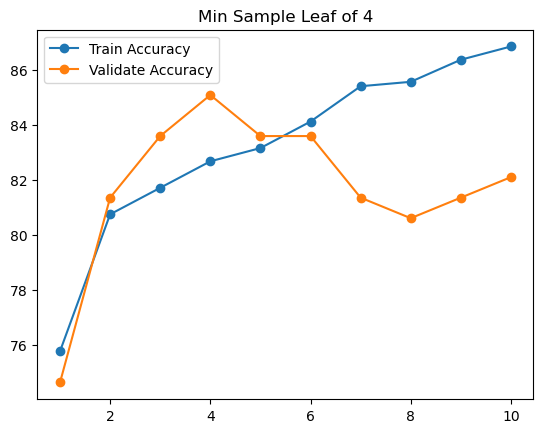

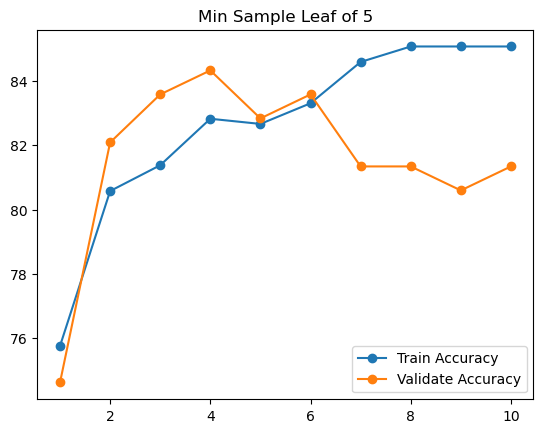

In [89]:
for i in range(1, 6):
    points = acc[acc['leaf']==i]
    
    plt.plot(points.depth, points.train_acc, marker='o', label='Train Accuracy')
    plt.plot(points.depth, points.val_acc, marker='o', label='Validate Accuracy')
    plt.title(f'Min Sample Leaf of {i}')
    plt.legend()
    plt.show()
        


**Takeaways**

- For in sample data the best model is Max Depth = 10 and Min Sample Leaf = 1
- For out of sample data the best model is Max Depth = 4 and Min Sample Leaf = 4
- The closest metrics are at Max Depth = 5 and Min Sample leaf of 5